<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Introduction to Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.3 - Exploratory data analysis
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
movie_df=pd.read_csv('./../data/processed.csv')
movie_df.sample(10)

,Name,Released year,Genre,Director,Runtime (h),Score,Status,Language,Budget ($),Revenue ($)
2960,Her,2013,"'Romance', 'Science Fiction', 'Drama'",Spike Jonze,2.10,79.0,Released,English,23000000.0,47351251.0
4178,Aliens in the Attic,2009,"'Adventure', 'Comedy', 'Family', 'Fantasy', 'S...",John Schultz,1.43,57.0,Released,English,45000000.0,57881056.0
2522,Puss in Book: Trapped in an Epic Tale,2017,"'Family', 'Fantasy', 'Animation', 'Comedy', 'A...",Roy Burdine,NaN,66.0,Released,English,NaN,NaN
3883,How to Make an American Quilt,1995,"'Drama', 'Romance'",Jocelyn Moorhouse,1.93,64.0,Released,English,10000000.0,41200020.0
716,Roald Dahl's Matilda the Musical,2022,"'Family', 'Comedy', 'Fantasy'",Matthew Warchus,1.95,68.0,Released,English,25000000.0,35600000.0
3896,Carol,2015,"'Romance', 'Drama'",Todd Haynes,1.97,75.0,Released,English,11800000.0,40272135.0
4278,Savage Grace,2007,'Drama',Tom Kalin,1.62,57.0,Released,English,4600000.0,1432799.0
1038,Emmanuelle,1974,"'Drama', 'Romance'",Just Jaeckin,1.57,60.0,Released,French,500000.0,NaN
85,May December,2023,"'Drama', 'Comedy'",Samy Burch,1.95,67.0,Released,English,20000000.0,223505.0
2251,Lupin the Third: Goemon's Blood Spray,2017,"'Animation', 'Action', 'Crime'",Takeshi Koike,NaN,79.0,Released,Japanese,NaN,NaN


In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           5000 non-null   object 
 1   Released year  5000 non-null   int64  
 2   Genre          4994 non-null   object 
 3   Director       4995 non-null   object 
 4   Runtime (h)    4729 non-null   float64
 5   Score          5000 non-null   float64
 6   Status         5000 non-null   object 
 7   Language       5000 non-null   object 
 8   Budget ($)     3275 non-null   float64
 9   Revenue ($)    3385 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 390.8+ KB


> **NOTES:**
>
> - The dataset: The sample consists of 5000 movies from popular films according to https://www.themoviedb.org/movie.
>
> - The "Status" column in the data is mostly set to the value "Released" because there are few movies known to be in production or have just been completed.
>
> - As these are popular movies worldwide, the language of these films is predominantly English.

# Question: Net profit and net profit margin of movie industry through time (1961-now)

## Step 0: Purpose 

- Identify the market trends in the film production industry over the years, especially in recent times.
- Answering these questions will help formulate a strategy and decide whether it is advisable to produce films at the current time or not.

## Step 1: Analyzing

- Calculate `Net profit = Revenue - Budget`.
- Calculate `Net profit margin = Net profit / Revenue`.
- Get only the year from 1961 (index = 25).

In [4]:
cleaned_df = movie_df[['Released year','Budget ($)','Revenue ($)']].dropna()
cleaned_df['Net profit'] = cleaned_df['Revenue ($)']-cleaned_df['Budget ($)']
cleaned_df['Net profit margin'] = (cleaned_df['Revenue ($)']-cleaned_df['Budget ($)'])/cleaned_df['Revenue ($)']
cleaned_df = cleaned_df.groupby('Released year').mean()
cleaned_df = cleaned_df.iloc[25:]

## Step 2: Visualization

- Draw the bar line plot to visualize the data above.

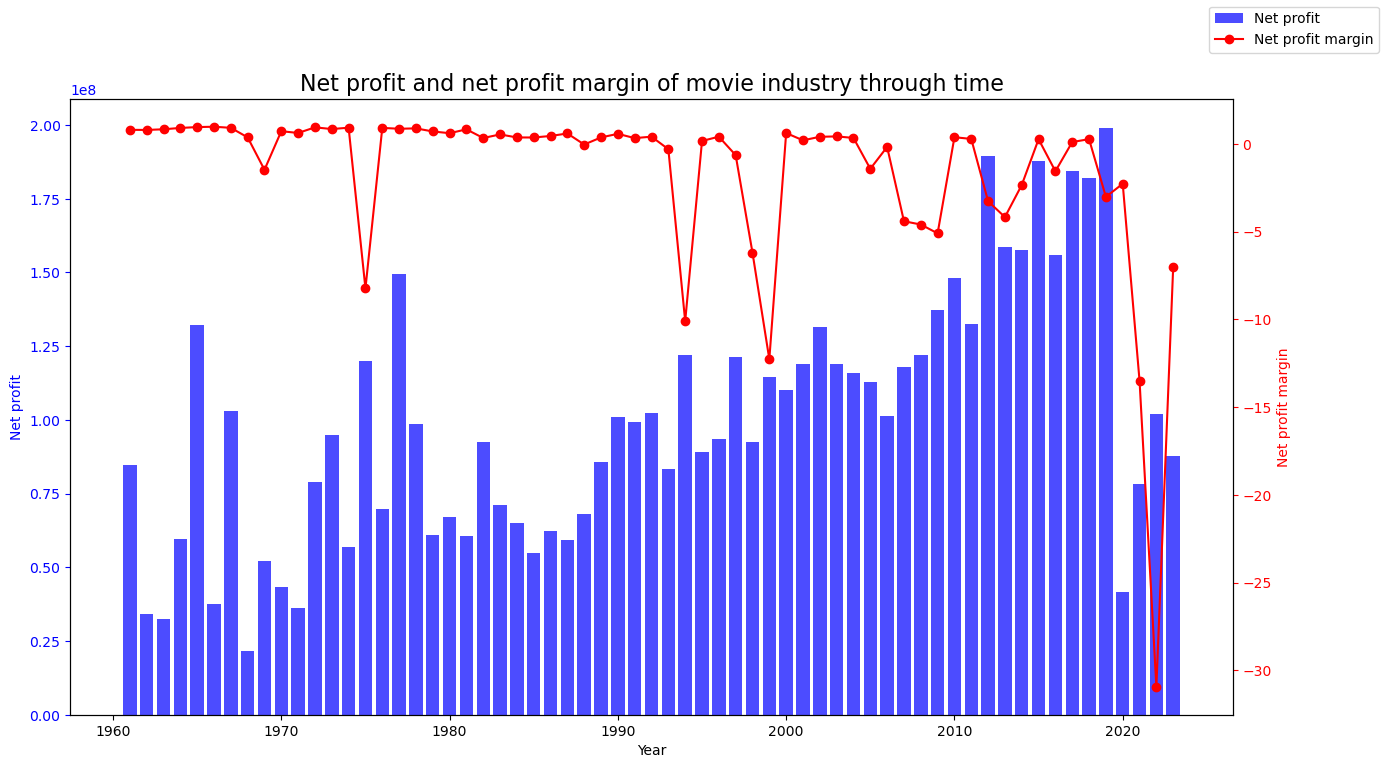

In [5]:
x = cleaned_df.index
y1 = cleaned_df['Net profit']
y2 = cleaned_df['Net profit margin']

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar plot on the primary y-axis (left)
ax1.bar(x, y1, color='b', alpha=0.7, label='Net profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net profit', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis (right)
ax2 = ax1.twinx()
ax2.plot(x, y2, color='r', linestyle='-', marker='o', label='Net profit margin')
ax2.set_ylabel('Net profit margin', color='r')
ax2.tick_params('y', colors='r')

# Add a legend
fig.legend()

# Title for the entire plot
plt.title('Net profit and net profit margin of movie industry through time',fontsize=16)

# Show the plot
plt.show()

## Step 3: Give observations

- The average annual profit has been steadily increasing over time.
- The net profit margin has been trending downwards in recent years, especially during the COVID-19 pandemic.
- Since the post-COVID-19 period, the film industry has been showing signs of recovery and growth.
- Film producers should consider focusing on production at this time.

# Question: Identify the most successful directors of all time

## Step 0: Purpose

- Look up information on renowned directors so that filmmakers can collaborate for potentially higher profits.
- Movie enthusiasts may be aware of famous directors, allowing them to look up information about their films to watch.





## Step 1: Analyzing

- Get only top 10 directors that have the most total revenue.

In [6]:
cleaned_df = movie_df.groupby('Director')['Revenue ($)'].sum().sort_values(ascending=False).head(10)[::-1]

## Step 2: Visualization

- Using the horizontal bar chart to visualize the data above.

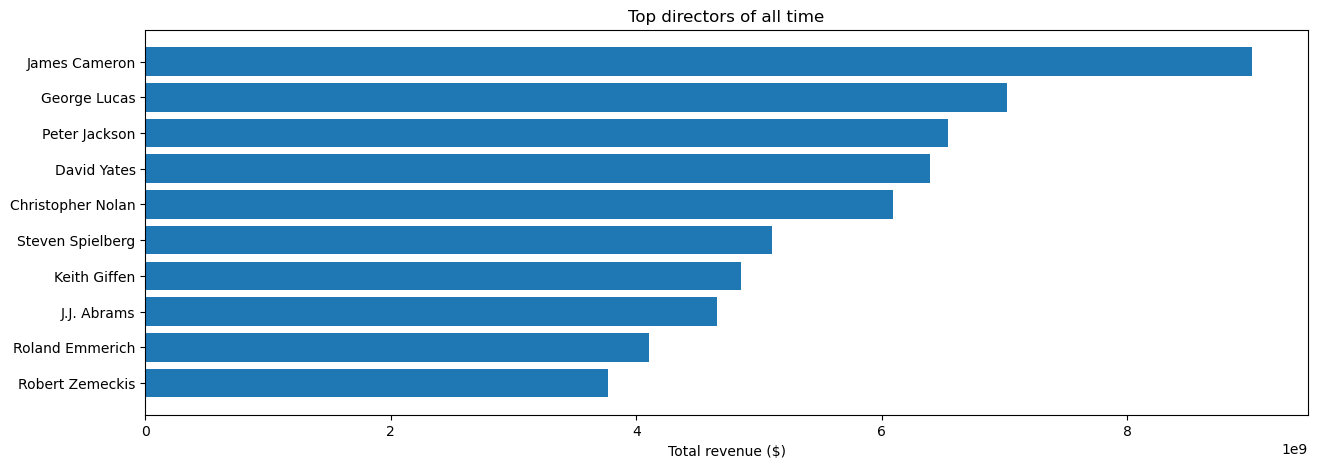

In [7]:
plt.figure(figsize=(15,5))
plt.barh(cleaned_df.index,cleaned_df.values)
plt.title('Top directors of all time')
plt.xlabel('Total revenue ($)')
plt.show()

## Step 3: Give observations

- Based on the chart, we can determine the top 10 directors with the highest revenue from film production.

# Question: Identify the most top-rated movies in each genre

## Step 0: Purpose

- Assist viewers in choosing a movie more easily.
- Define a noteworthy film as one that satisfies both of the following criteria:
    - Massive revenue: > the percentile 75% of the revenue column.
    - Among the high-grossing films, select those with the highest ratings; these are the films to be found.

## Step 1: Analyzing

- For convenience, let's only consider the top 10 most high rated films for each genre.

In [8]:
cleaned_df = movie_df[movie_df['Revenue ($)']>movie_df['Revenue ($)'].quantile(0.75)][['Name','Genre',
                                                                                       'Score','Revenue ($)']].reset_index(drop=True)
cleaned_df['Genre'] = cleaned_df['Genre'].str.split(', ')
cleaned_df = cleaned_df.explode('Genre').sort_values(['Genre','Score'],ascending=[True,False]).groupby('Genre').head(10)

## Step 2: Visualization

- Using the dual bar chart to visualize the data above.

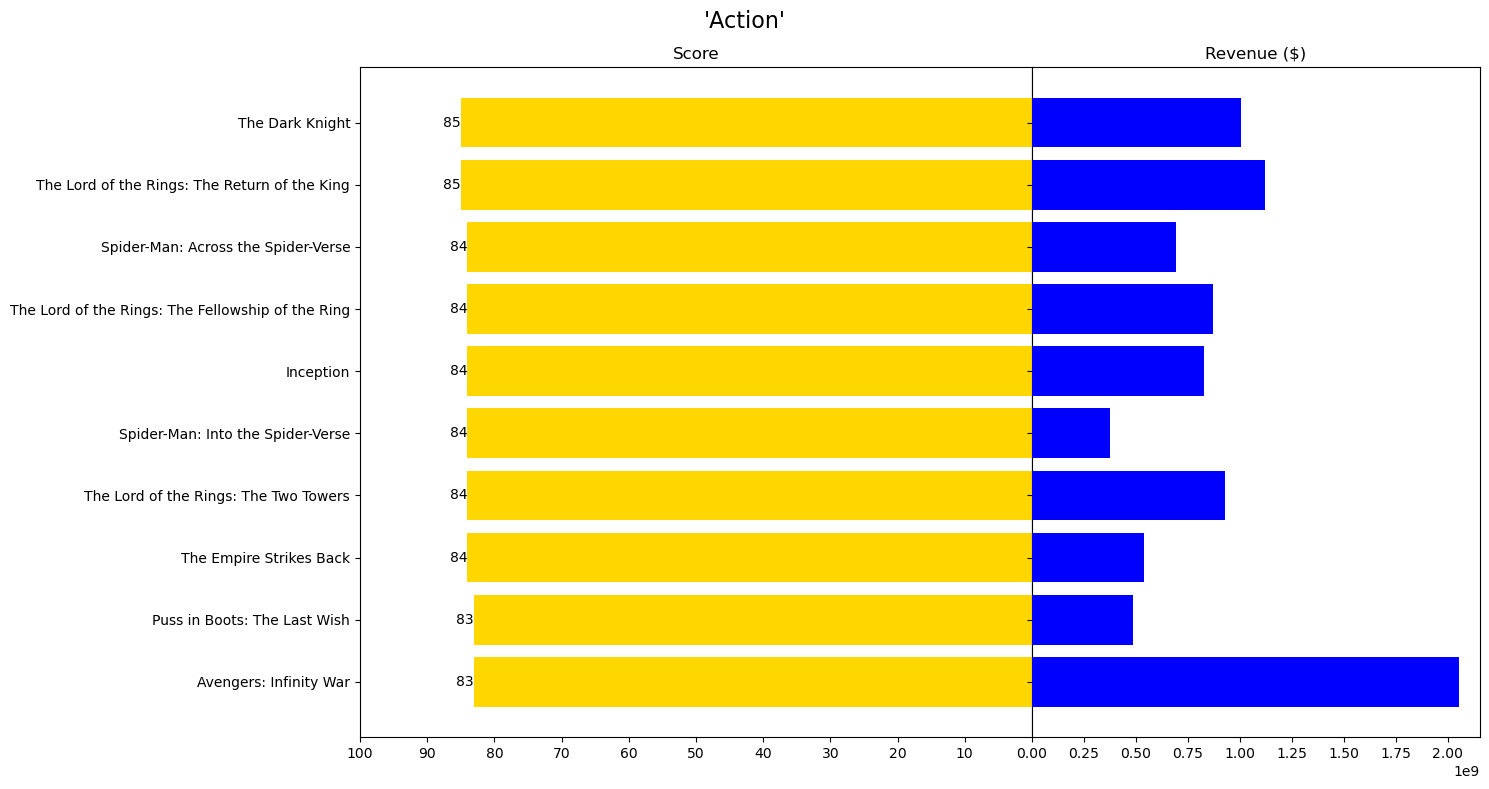

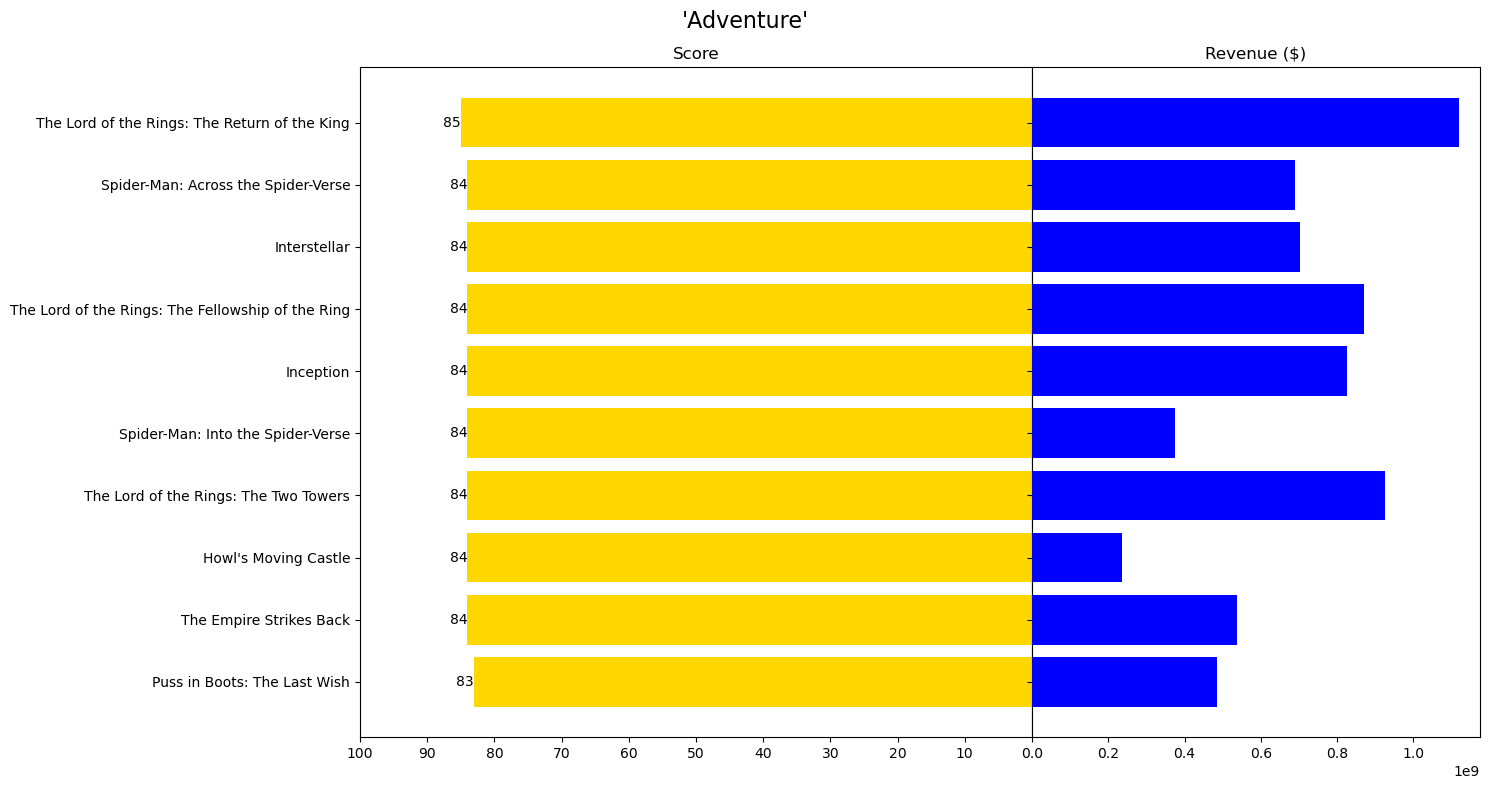

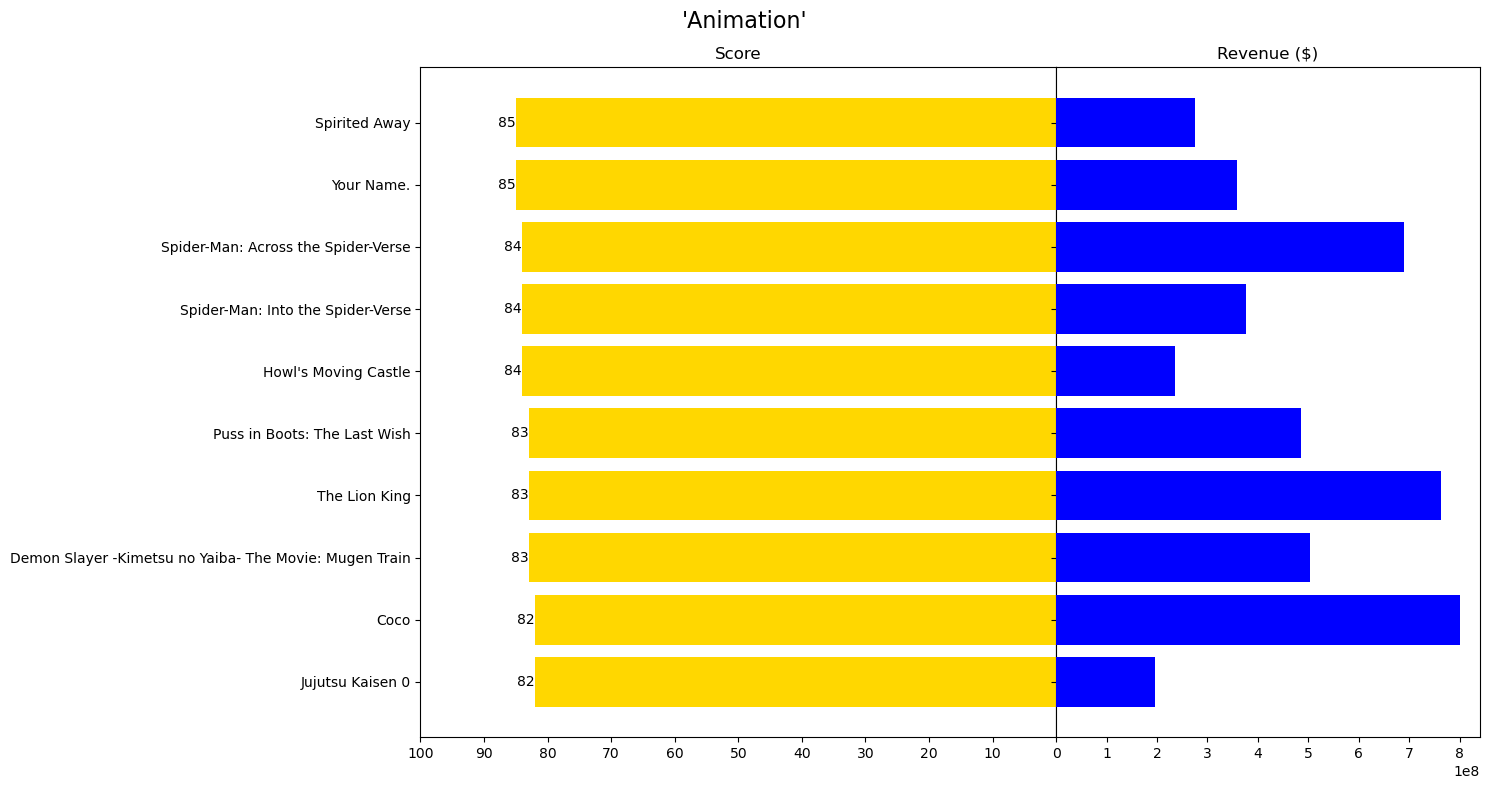

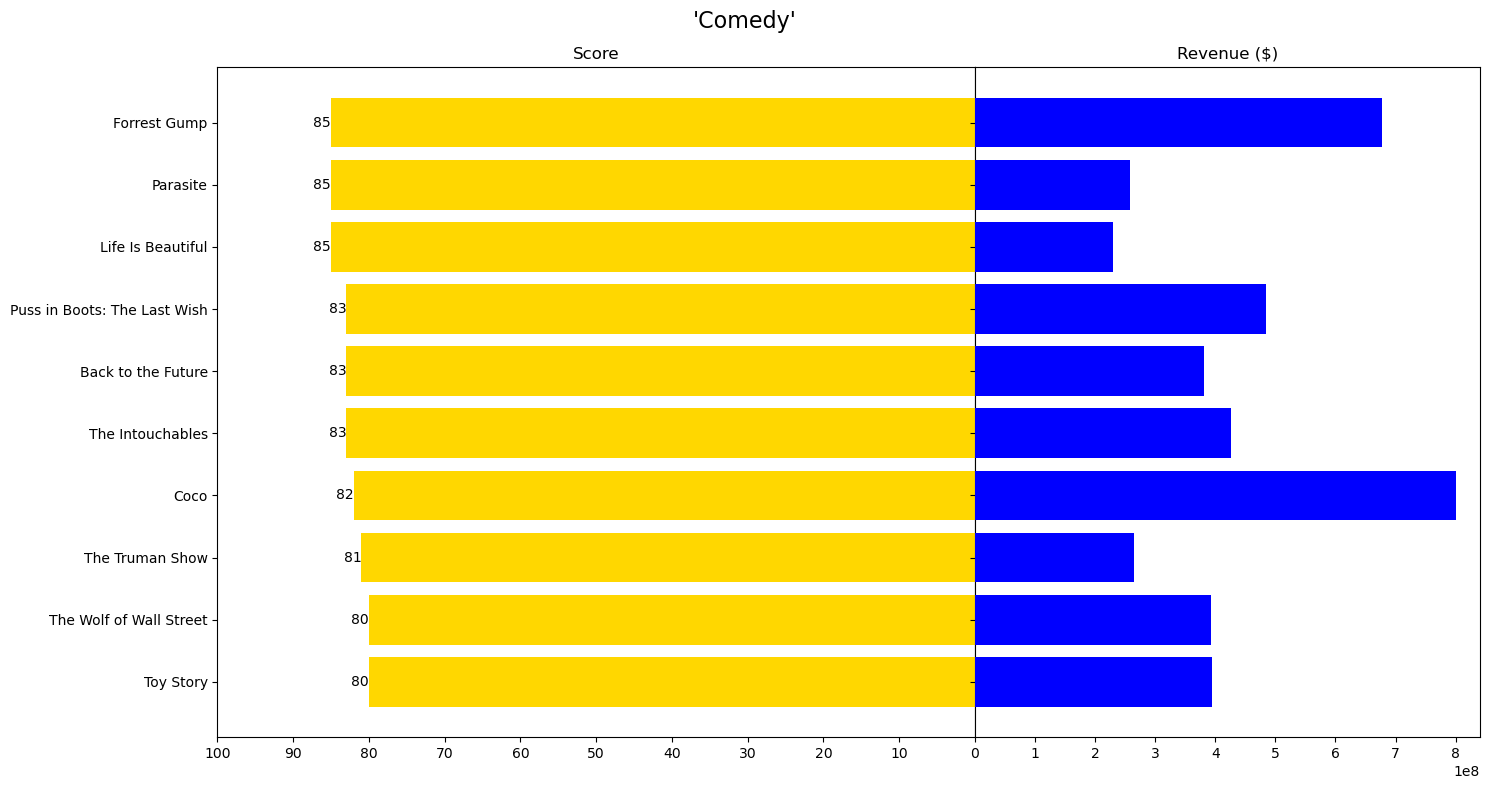

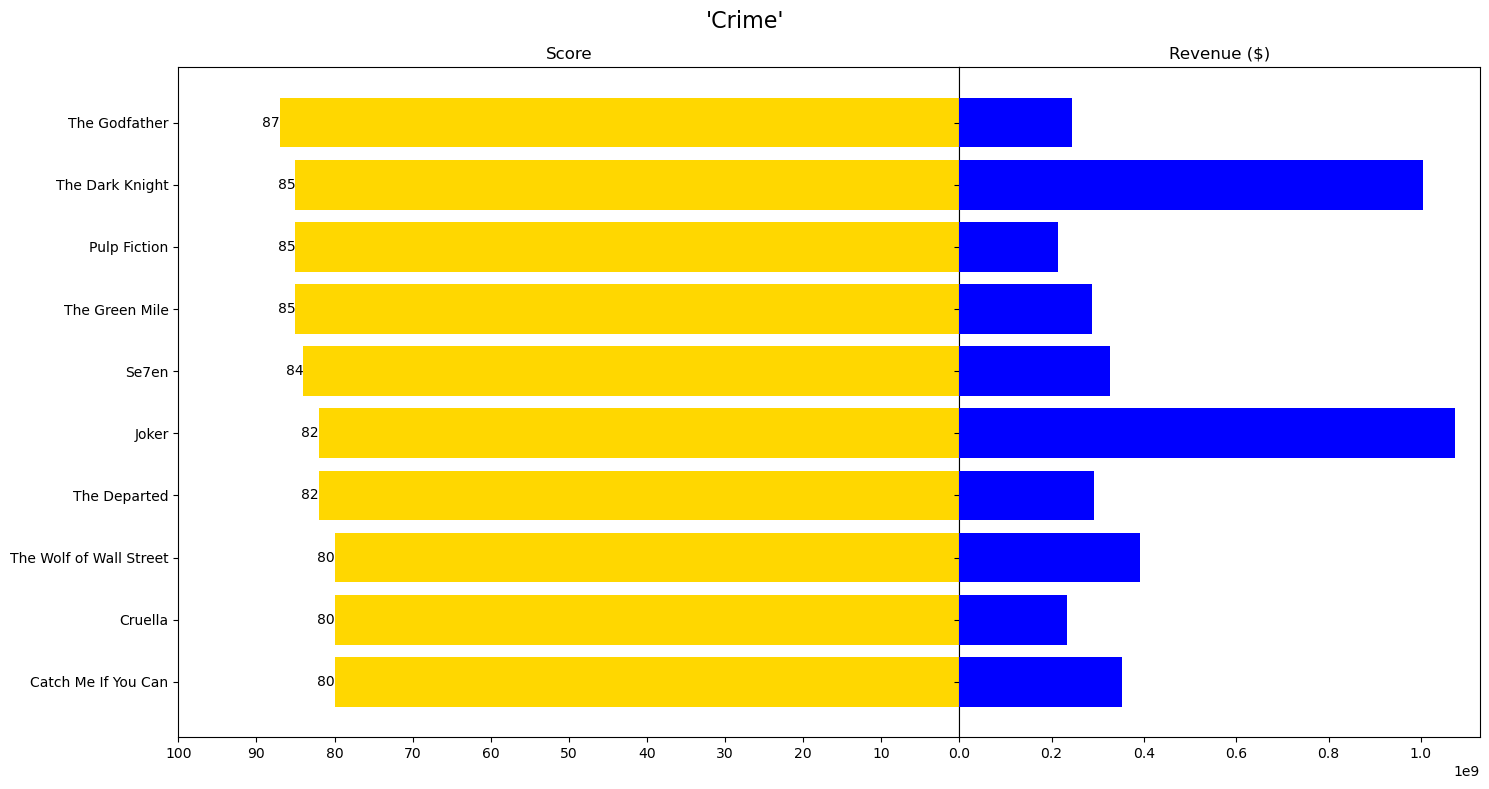

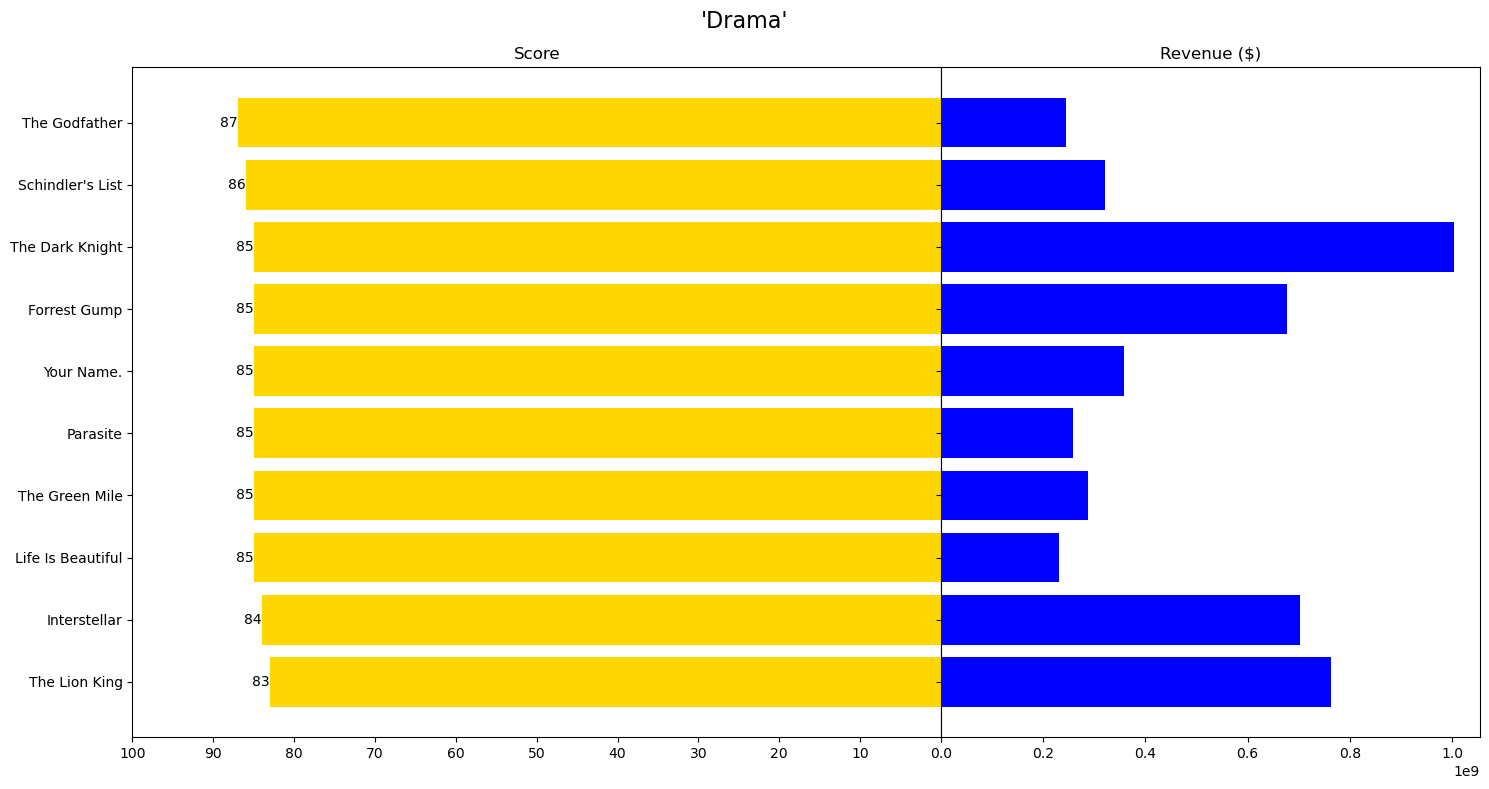

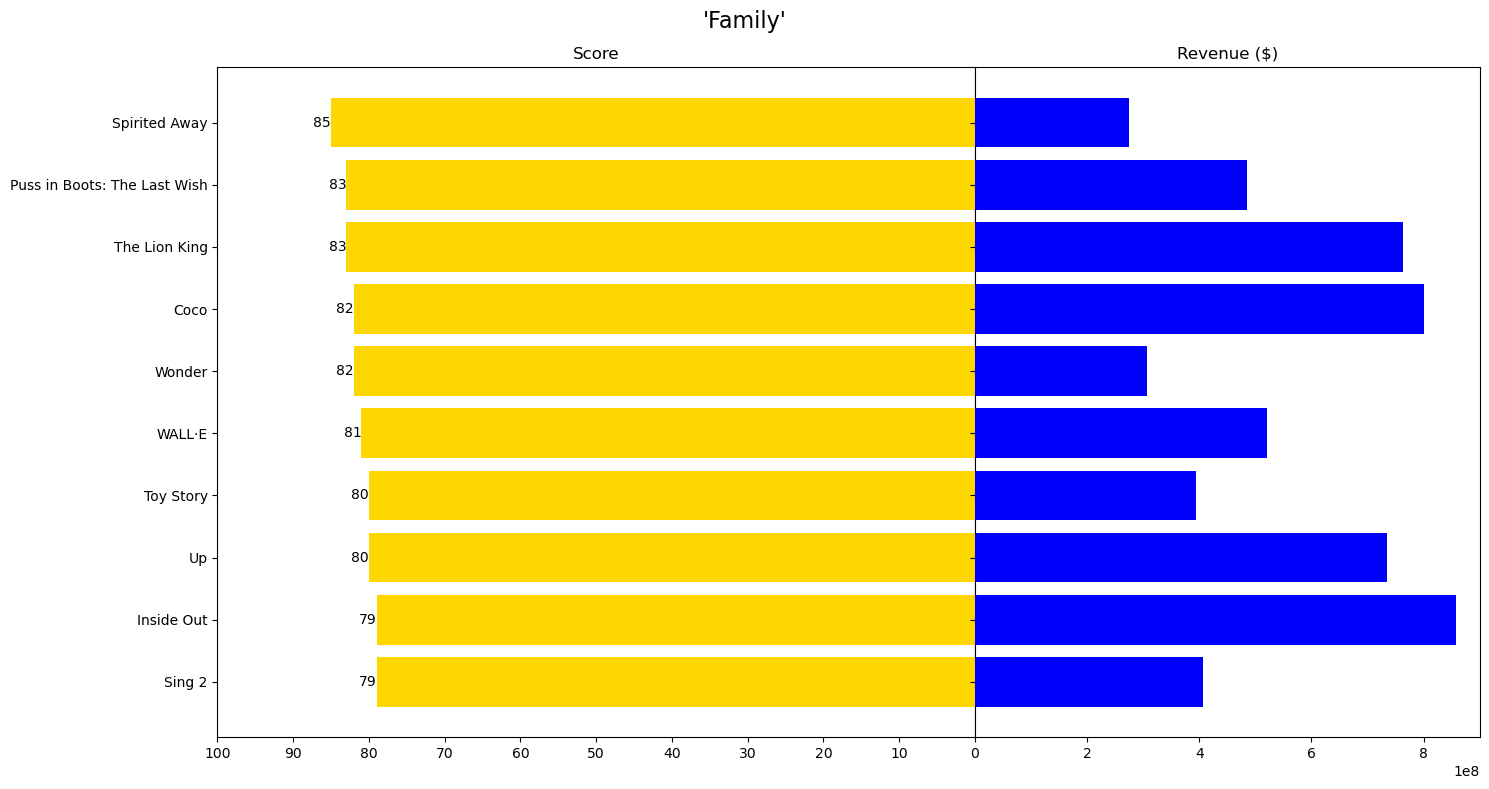

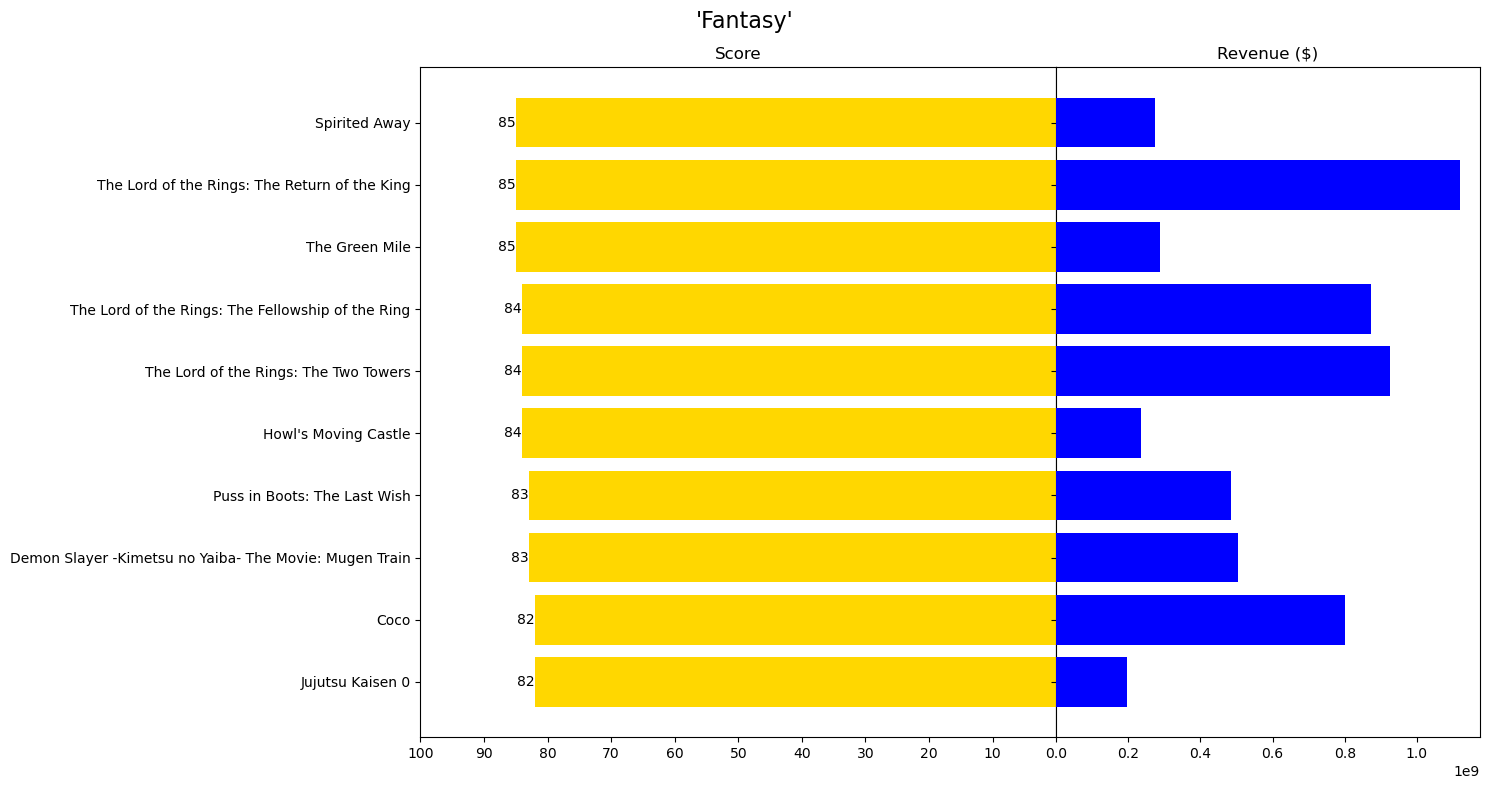

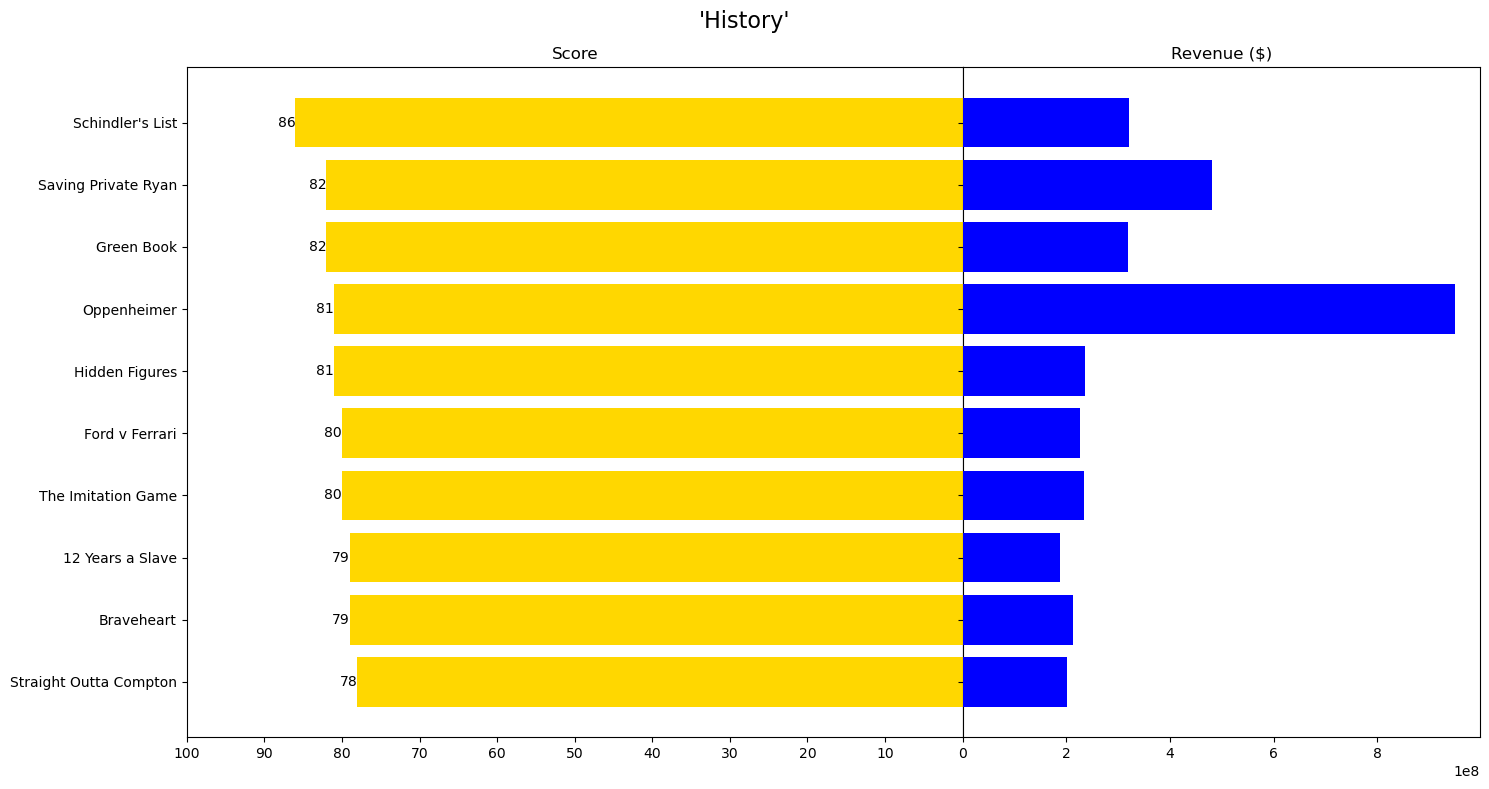

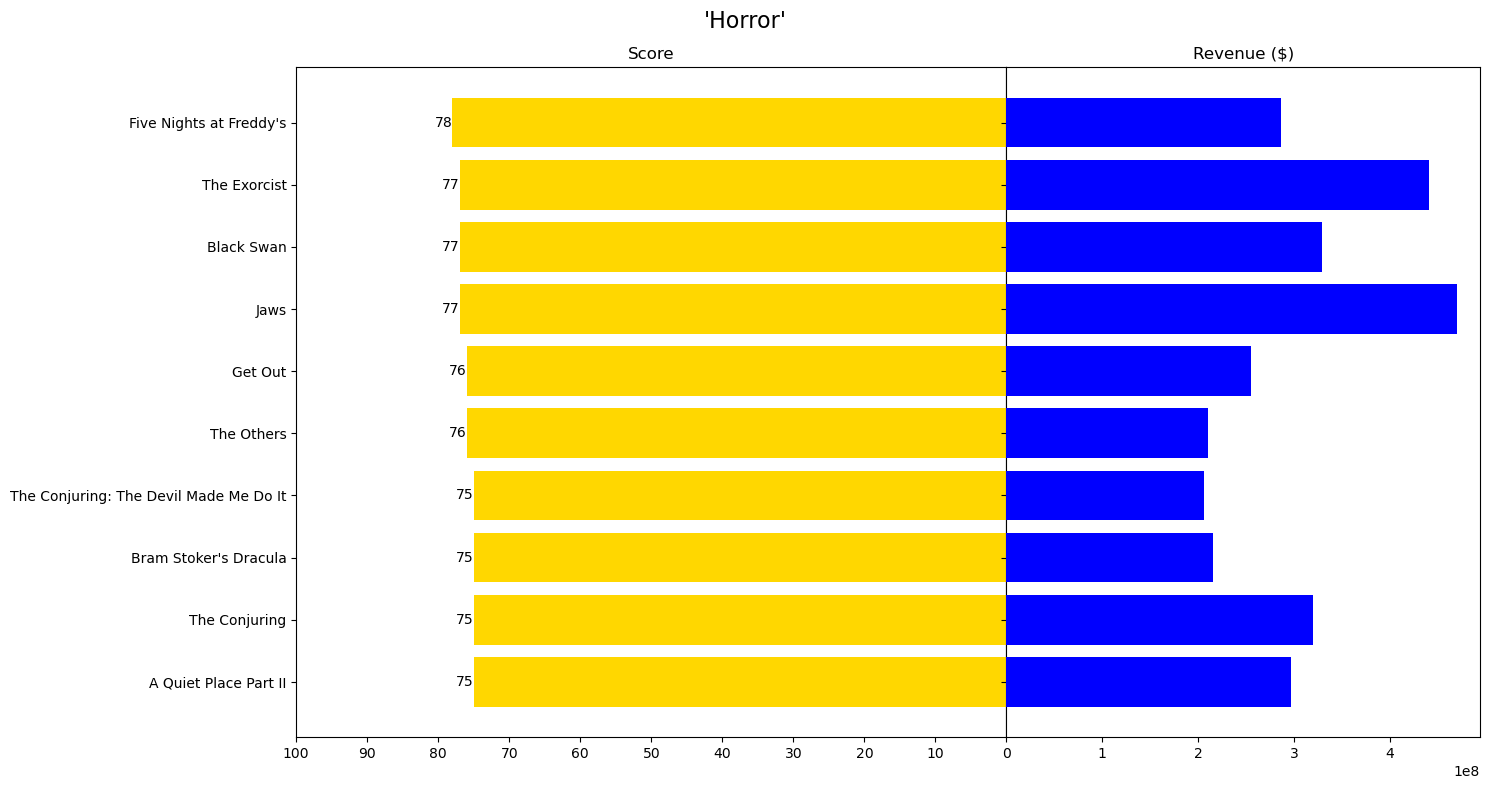

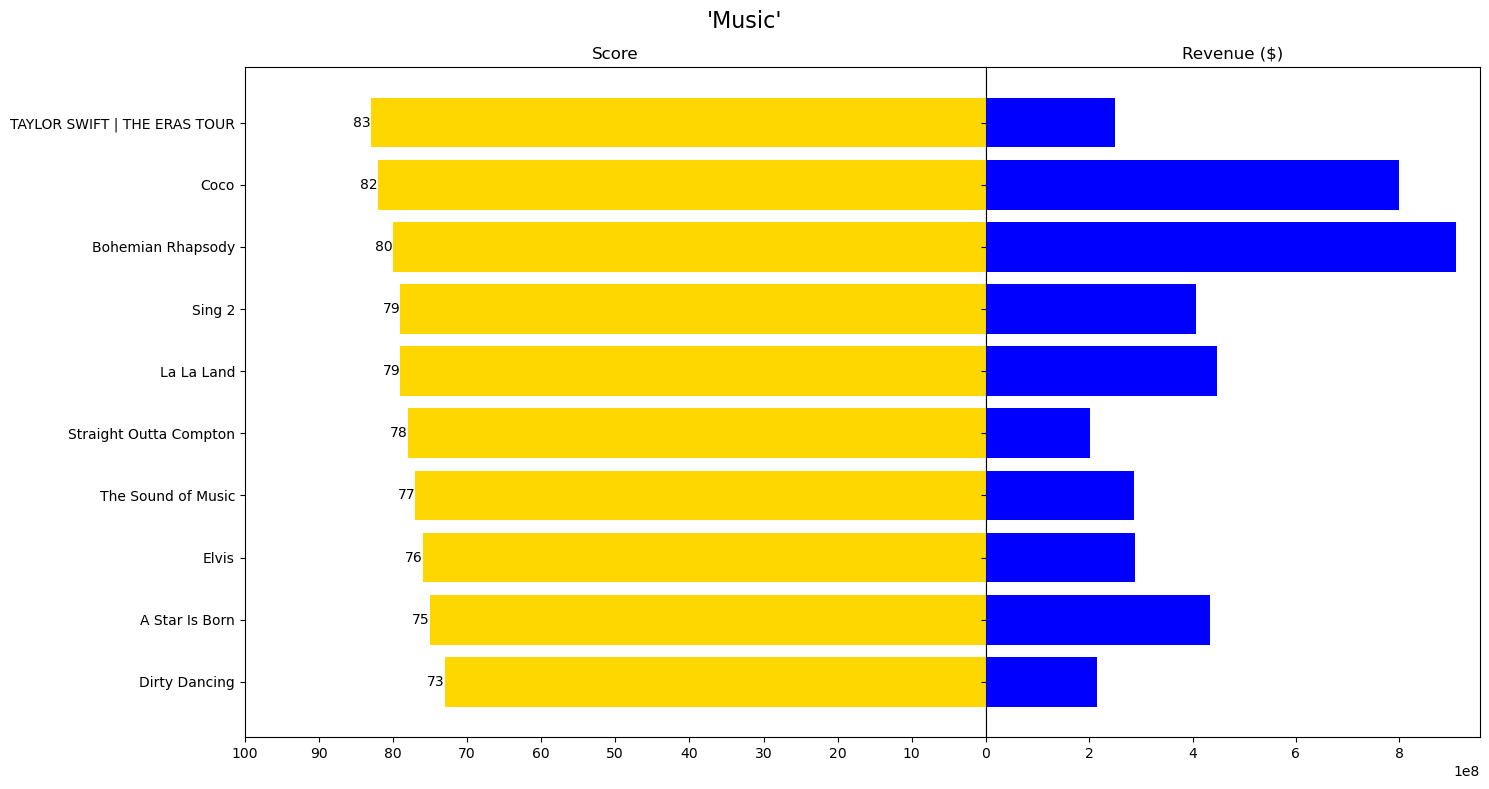

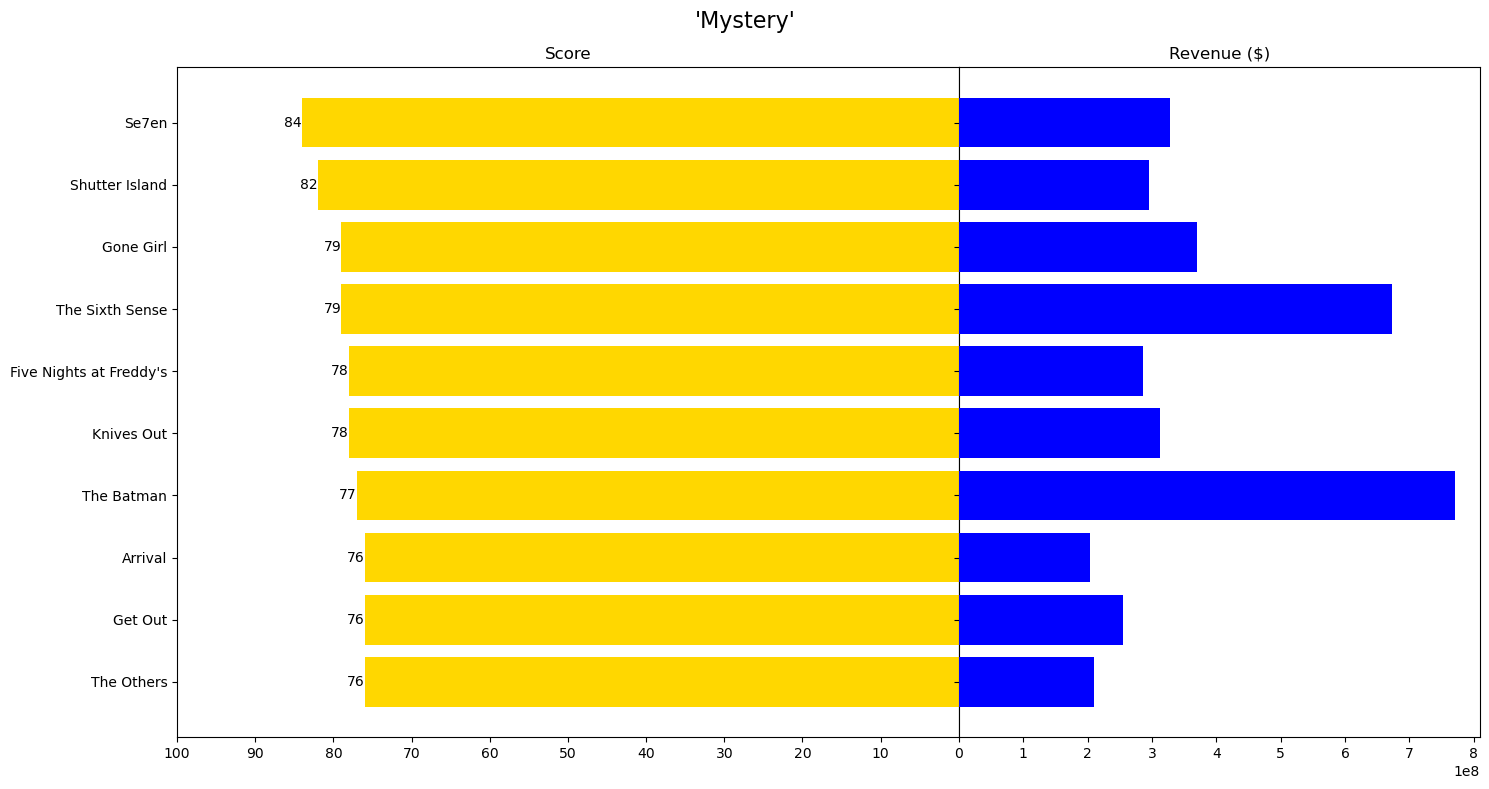

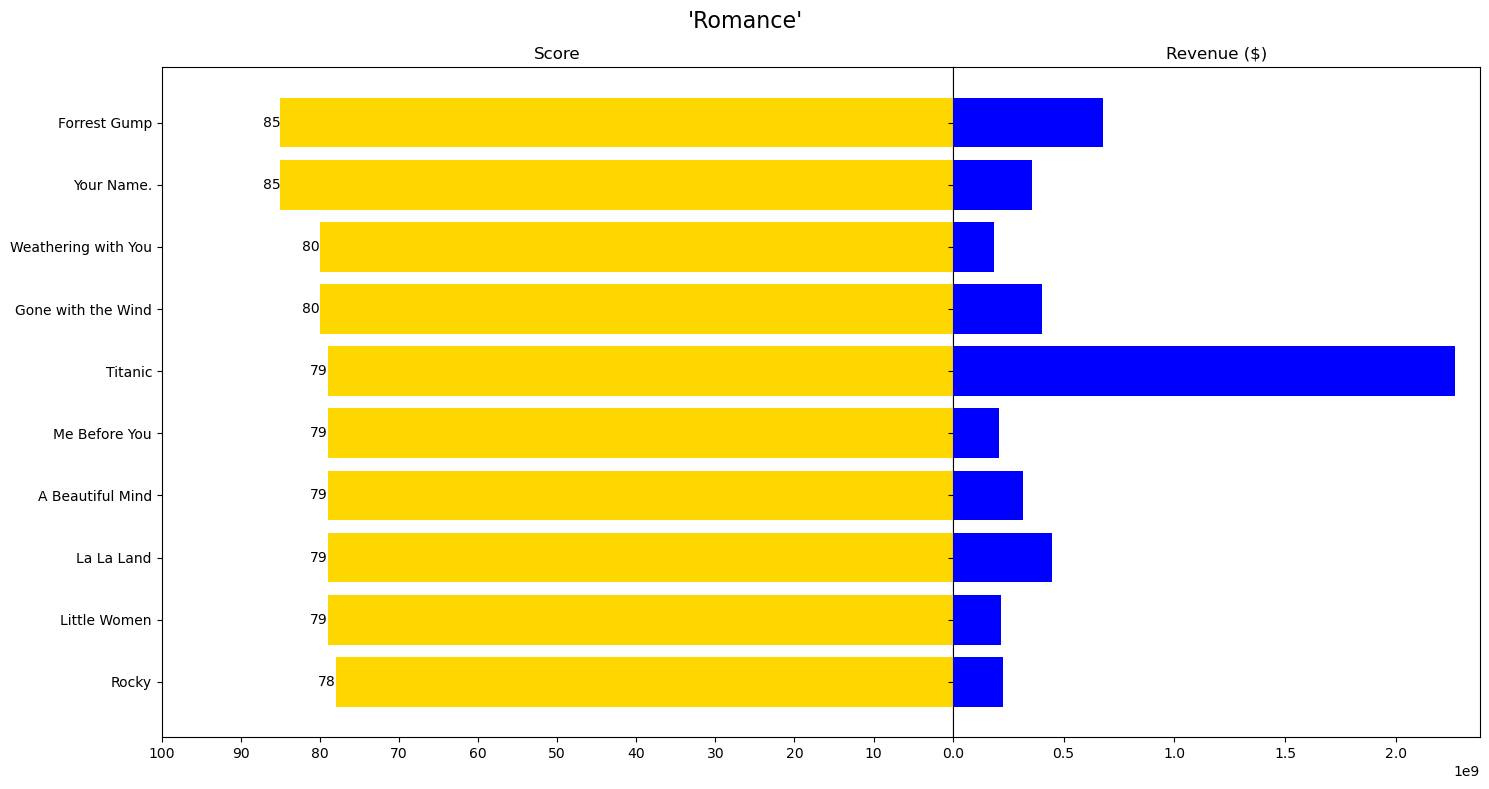

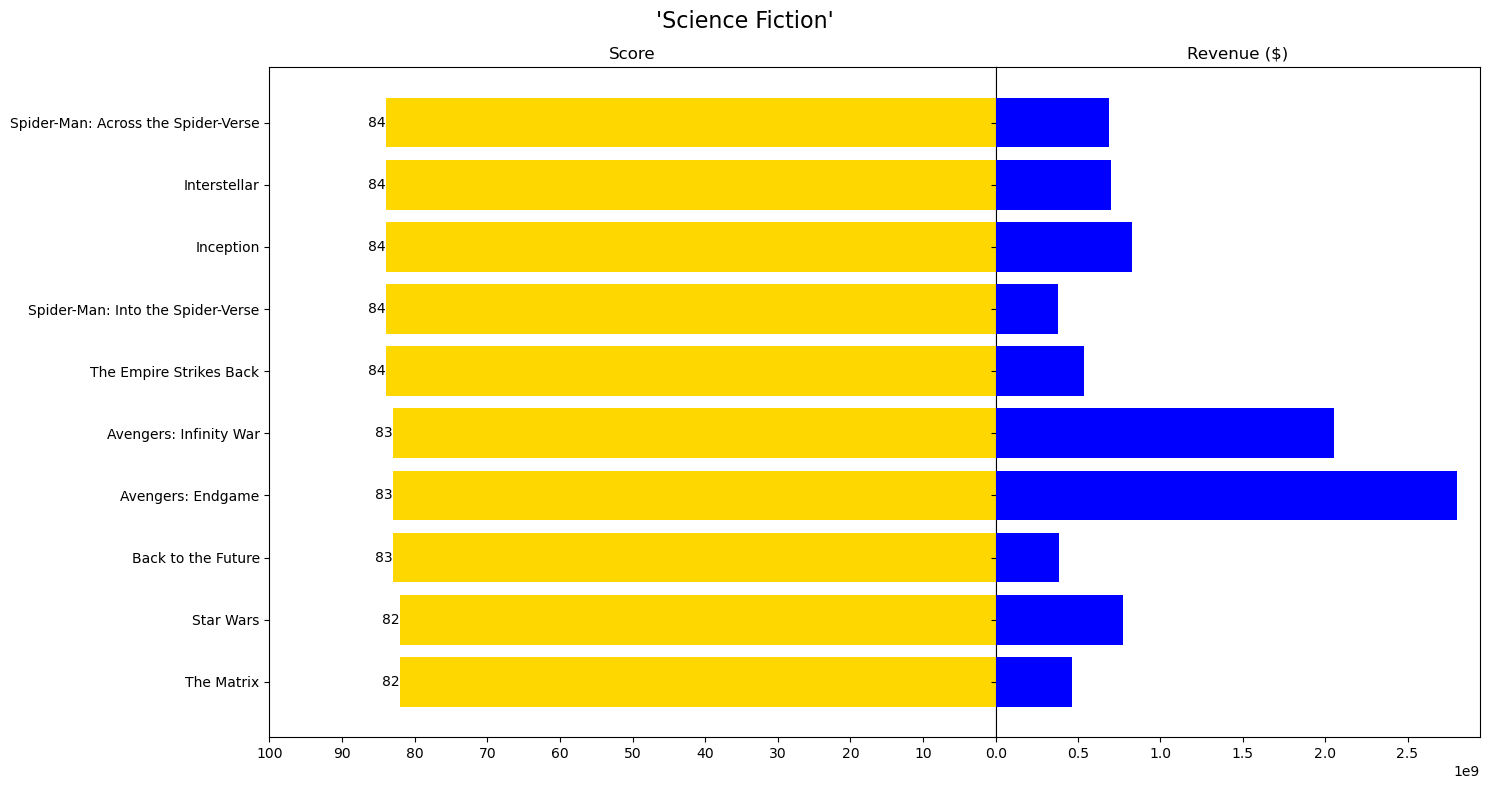

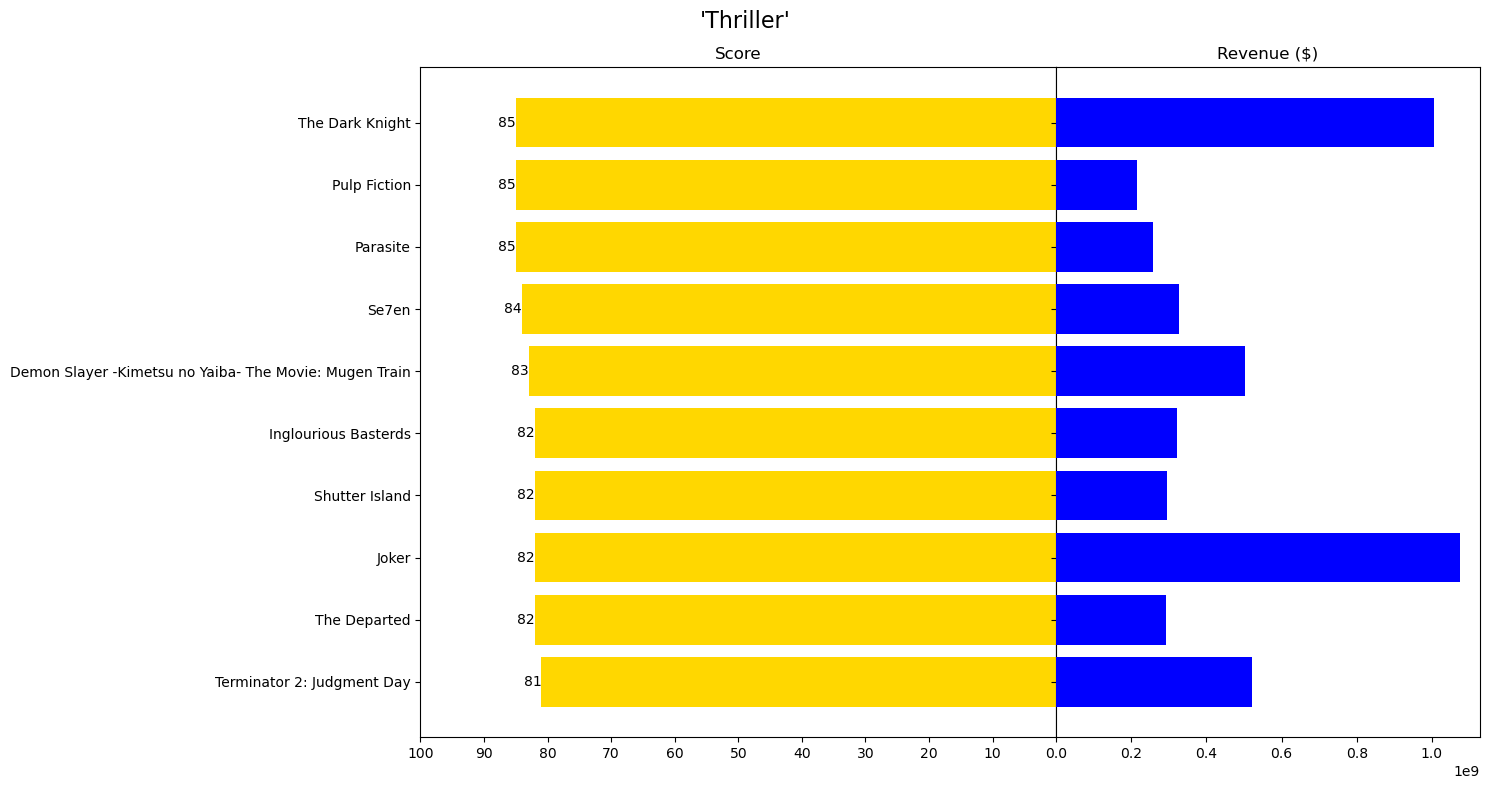

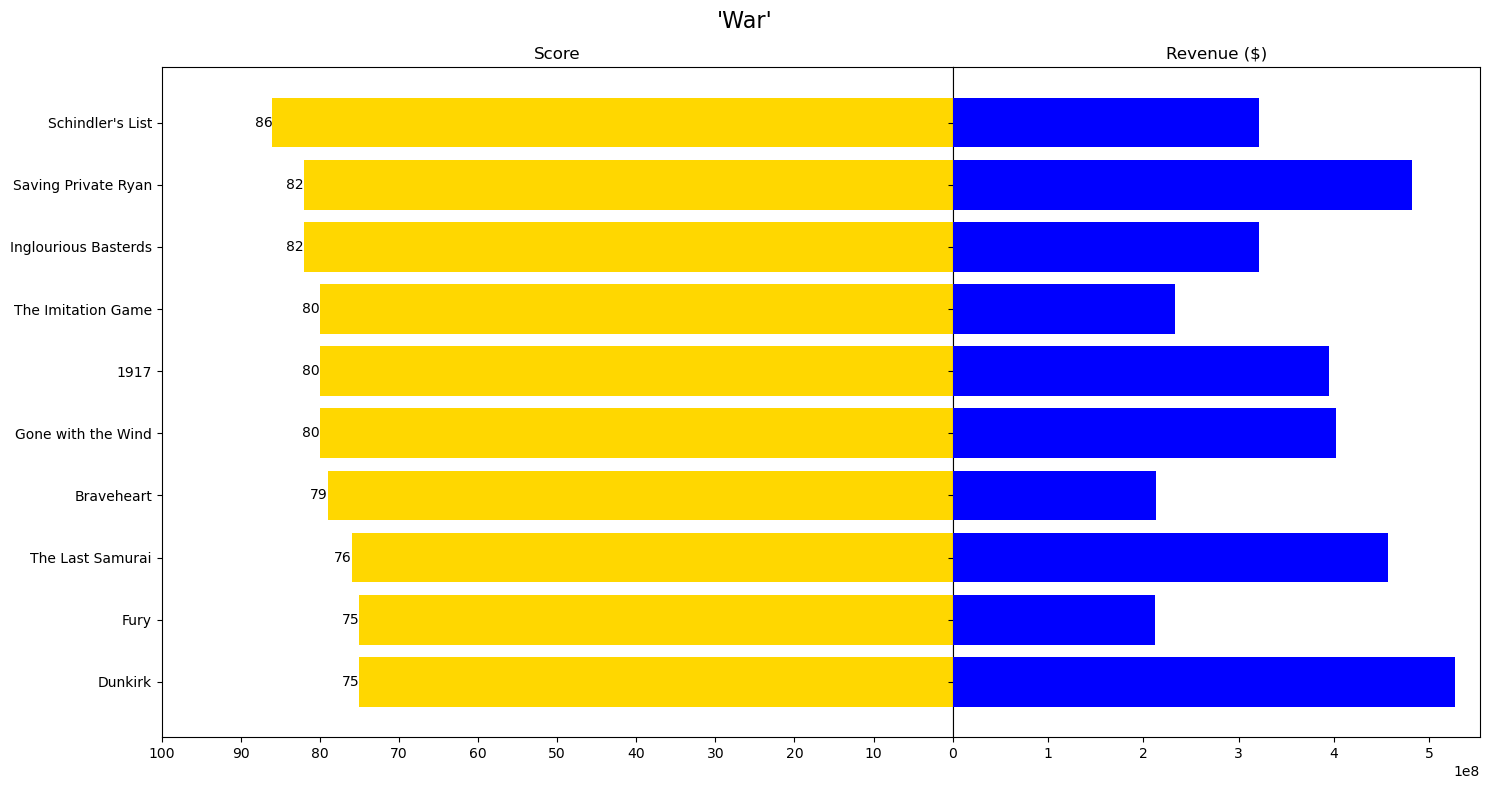

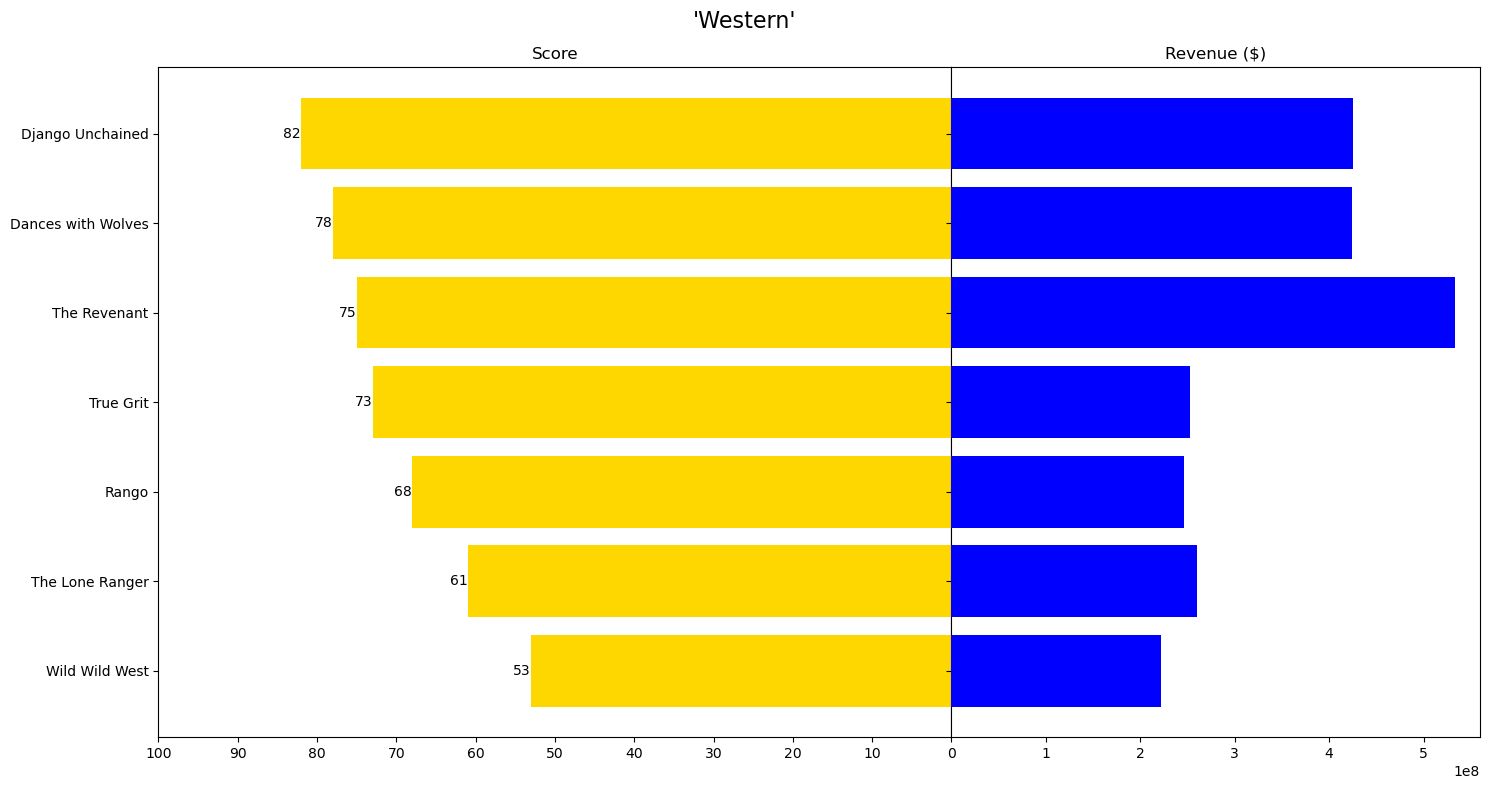

In [9]:
for genre in cleaned_df.Genre.unique():
    df = cleaned_df[cleaned_df['Genre']==genre].iloc[::-1]
    movies = df['Name']
    score = df['Score']
    revenue = df['Revenue ($)']
    
    fig, axes = plt.subplots(figsize=(15,8), ncols=2, sharey=True, gridspec_kw={'width_ratios': [1.5, 1]})
    fig.suptitle(genre,fontsize=16)
    p = axes[0].barh(movies, score, align='center', color='gold', zorder=10)
    axes[0].set(title='Score')
    axes[1].barh(movies, revenue, align='center', color='blue', zorder=10)
    axes[1].set(title='Revenue ($)')
    
    axes[0].invert_xaxis()
    axes[0].set(yticks=movies, yticklabels=movies, xticks=[10,20,30,40,50,60,70,80,90,100])
    axes[0].bar_label(p,label_type='edge')
    
    fig.tight_layout()
    fig.subplots_adjust(wspace=0)
    plt.show()

## Step 3: Give observations

- Based on the graph, we can identify the top 10 most high rated movie titles for each genre.